## Importing library and loading processed data

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
nlp = spacy.load('en_core_web_sm')
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [35]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
import plotly.tools as tls
import plotly.graph_objs as go
import base64
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline


In [3]:
df = pd.read_csv(
    'D:/Projects/Topic modelling/Code/topic_modelling/data_cleaning/processed_data_new.csv')


In [4]:
df.head()

,date,id,content,user,reply_count,retweet_count,likecount,quotecount,ct
0,2021-10-17 04:41:51+00:00,1.449600e+18,@SujibDr Thank Sir for the information. Last d...,https://twitter.com/MrinChemKar,0,0,0,0,thank information predict disastrous
1,2021-10-17 03:17:40+00:00,1.449580e+18,@biswajitmohanty when v hav allowed well entre...,https://twitter.com/amphan_may2020,0,0,0,0,century matter catch drug peddling
2,2021-10-16 15:06:12+00:00,1.449390e+18,"From the cities to the villages, Amphan left B...",https://twitter.com/ishadrita,1,0,1,0,left climate crisis
3,2021-10-16 15:03:42+00:00,1.449390e+18,"What many have mocked as my claim to stardom, ...",https://twitter.com/ishadrita,0,0,5,0,claim stardom believe night life floor apartment
4,2021-10-16 08:31:43+00:00,1.449290e+18,#WorldFoodDay2021 \nIn the cyclone Amphan deva...,https://twitter.com/ri_montu,0,7,17,0,area coast hard time live price rice broken ri...


In [5]:
df.isna().sum()

date             0
id               0
content          0
user             0
reply_count      0
retweet_count    0
likecount        0
quotecount       0
ct               1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(51591, 9)

## Removing stopwords


In [8]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [9]:
df['ct'] = df['ct'].apply(lambda x: remove_stopwords(x))

In [10]:
df['ct']

0                     thank information predict disastrous
1                       century matter catch drug peddling
2                                      left climate crisis
3         claim stardom believe night life floor apartment
4        area coast hard time live price rice broken ri...
                               ...                        
51587                             understand pruce musical
51588                         fantastic sort gross theater
51589                                 pick pair glass cool
51590                               orchestra listen music
51591                        homework listen music instead
Name: ct, Length: 51591, dtype: object

In [11]:
text=df.ct.values.tolist()

## Modelling

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)


In [13]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

class LemmaCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [14]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)


## NNMF

In [15]:
from sklearn.decomposition import NMF


In [16]:
nmf = NMF(n_components=10, solver="mu")

W = nmf.fit_transform(tf)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [17]:
W

array([[7.88975180e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.73658278e-08, 1.17164462e-03],
       [1.82218552e-03, 0.00000000e+00, 1.90167067e-03, ...,
        0.00000000e+00, 1.27541619e-03, 0.00000000e+00],
       [1.95728359e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.80552495e-03, 5.93071051e-14],
       ...,
       [6.71690077e-04, 0.00000000e+00, 7.56738389e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.27593707e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.88491308e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.72422376e-04, 0.00000000e+00]])

In [18]:
# params = {
#     'n_components': [10, 12, 15],
#     'learning_decay': [0.75, 0.80, 0.85]
# }

# lda_search = GridSearchCV(lda,
#                           param_grid=params,
#                           cv=3,
#                           return_train_score=False)

# lda_search.fit(tf)

# results = pd.DataFrame(lda_search.cv_results_)


## Getting our topics from the data using LDA

In [19]:
tf_feature_names = tf_vectorizer.get_feature_names()
n_top_words=30
print_top_words(nmf, tf_feature_names, n_top_words)



Topic #0:pray face hope pandemic safety situation lose crisis bad time city world life fight soon save thank attack locust think recover country home nature earthquake family loss impact right best

Topic #1:severe extremely intense coast turn cross alert afternoon meteorological evening weather weak morning depression adjoin close near late northeastward tomorrow island update source past northwest high brace forecast center bulletin

Topic #2:wind speed coast high cross afternoon near hour close maximum rain current increase evening morning update intensity late northeastward rainfall sustain impact tomorrow scary land past away city surge range

Topic #3:day electricity water power area service post supply work connection restore restoration mobile provide customer road connectivity phone team city drinking thank problem electric long past local care issue week

Topic #4:medium coverage cover social shame politics republic attention international devastate channel brief silent talk

C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



## Visualising our wordcloud for topics

In [33]:
first_topic = nmf.components_[0]
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]

second_topic = nmf.components_[1]
second_topic_words = [tf_feature_names[i]
                     for i in second_topic.argsort()[:-50 - 1:-1]]

third_topic = nmf.components_[2]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


fourth_topic = nmf.components_[8]
fourth_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


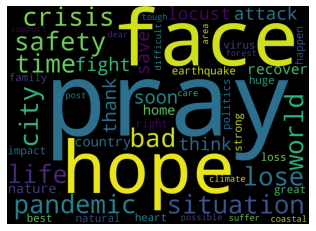

In [21]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


The above wordcloud states the fearness worryness in people mind to the cyclonic event in the first wave of Covid

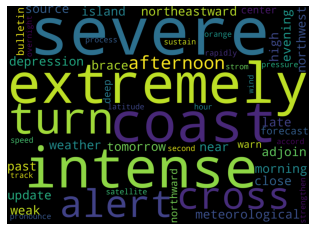

In [22]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()


The above wordcloud states the intensiveness of the cyclone that was about to struck the eastern coast

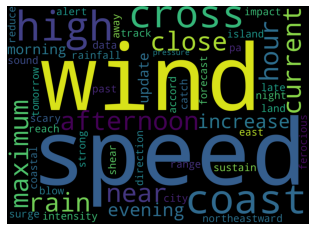

In [23]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()


The above wordcloud states the events that the cyclone brought like flooding, high wind speed,etc.

## Predict topics for given sentence

In [25]:
df_topic_keywords = pd.DataFrame(nmf.components_)


In [26]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in [
                         '-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=[
                             'NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = tf_vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = nmf.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(
        topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores





In [27]:
mytext = ["Feared from cyclone"]
topic, prob_scores = predict_topic(text=mytext)
print(topic)


[0.005636552073008799, 0.0018803125225932914, 1.6305092164671646e-16, 0.00020270188623539324, 0.0006304464331481069, 0.0015399964253986886, 0.0001650851483659258, 0.0006719839257017229, 0.0028722791585447985, 0.005555093877116704, 0.0004162902989590882, 0.0003387307520354375, 0.09418739114250703, 0.0005227049656553936, 0.0034531488811845768, 0.0002853167030819574, 0.00032887982869256923, 0.0007429437578462311, 0.0004239577421836703, 0.0002470642726816648, 4.6498513463654334e-05, 0.0057726928893260835, 0.00196204857641228, 0.0009203708457948716, 0.0009423358580169052, 0.004817066584184296, 2.49333633136104e-06, 0.010089226753856416, 0.05866620754250564, 0.00366742564180953, 0.003264110996703835, 0.000672549586245105, 0.001119470032161196, 0.003939824288159373, 0.0005755297281692953, 0.00032693424405455084, 4.775763870092807e-05, 0.00036476522920686656, 3.1423758539695964e-13, 0.0016159806921986282, 0.0020453749944765783, 0.002922255407875203, 0.000706249042601338, 0.03031855138926252, 0

In [28]:
nmf_output = nmf.transform(tf)


## Cluster documents that share same topic and similar topics

In [36]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

svd_model = TruncatedSVD(n_components=2)  
nmf_output_svd = svd_model.fit_transform(nmf_output)

x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(
    svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.28  0.36  0.28  0.38  0.22  0.21  0.29  0.36  0.35  0.39]
 [-0.12  0.67  0.32 -0.38 -0.28 -0.26  0.2  -0.18  0.15 -0.21]]
Perc of Variance Explained: 
 [0.09 0.13]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

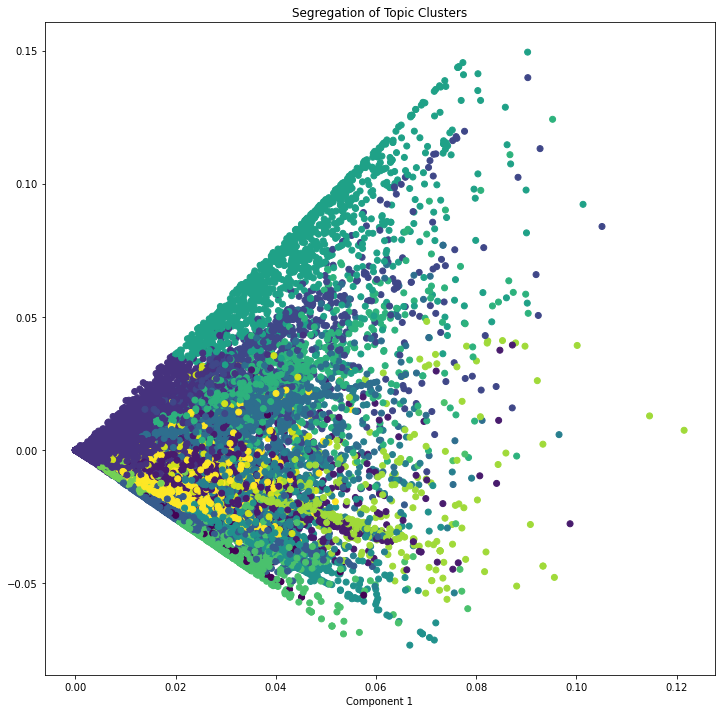

In [37]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )
